<font color='gray'><b>Notebook created:</b> 2021-04-28
<br>
    <b>Latest Updated</b>: 2021-05-03
<br>
<b>Author:</b> Matilda Eriksson
<br>
<b>Data Source:</b> Codecademy.com, OkCupid </b></font>

# <font color='Red'><b>Date-a-Scientist</b></font>

This is my final capstone project of the Data Science course on `Codecademy.com`. The dataset that I was given is from `OKCupid`, an app that focuses on using multiple choice and short answers to match users.

This is an open ended project where the goal is for me to formulate clear questions and apply machine learning techniques to answer those.

Some columns are named 'essay1', 'essay2' etc. The desciption of those are the following:

    essay0 - My self summary
    essay1 - What I’m doing with my life
    essay2 - I’m really good at
    essay3 - The first thing people usually notice about me
    essay4 - Favorite books, movies, show, music, and food
    essay5 - The six things I could never do without
    essay6 - I spend a lot of time thinking about
    essay7 - On a typical Friday night I am
    essay8 - The most private thing I am willing to admit
    essay9 - You should message me if…

# <font color='peru'>Exploration</font>
I will start by exploring the dataset briefly

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("rocket")
%matplotlib inline

In [2]:
df = pd.read_csv('profiles.csv')

In [3]:
display(df.shape)
display(df.duplicated().any())

(59946, 31)

False

In [4]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [5]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [6]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


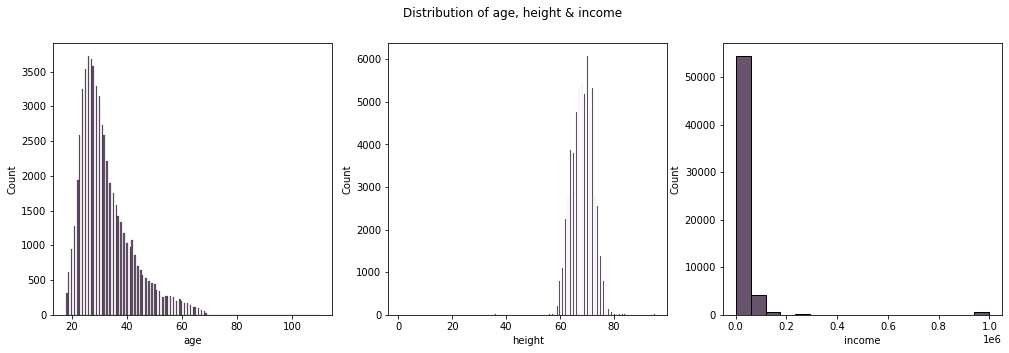

In [7]:
fig, ax = plt.subplots(1,3, figsize=(17,5))
fig.suptitle('Distribution of age, height & income')
sns.histplot(df.age, ax=ax[0])
sns.histplot(df.height, ax=ax[1])
sns.histplot(df.income, ax=ax[2]);

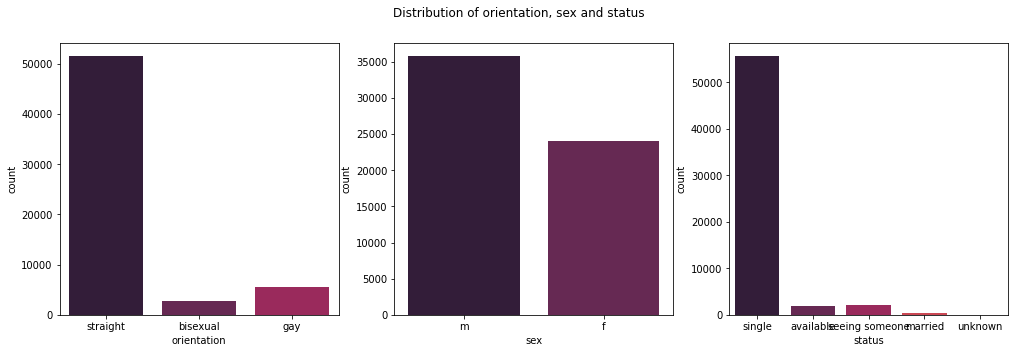

In [8]:
fig, ax = plt.subplots(1,3, figsize=(17,5))
fig.suptitle('Distribution of orientation, sex and status')
sns.countplot(x=df.orientation,ax=ax[0])
sns.countplot(x=df.sex, ax=ax[1])
sns.countplot(x=df.status,ax=ax[2]);

# <font color='peru'>Summary (Data Exploration)</font>
- We have a lot of observations, but also quite many missing values. Depending on what features I will use in my analysis, I will have to drop or fill them.
- The essay columns have html tags in them, which I will have to do something about if I use them.
- The different options for features such as education and offspring are many, which also are quite similar. Depending on the analysis, I might need to summarize the options into smaller groups and use label encoding.
- The app has more male than female users and most(!) of them are single
- The majority of the users are straight

# Ideas that I will look at..
1. Can we predict age by essay4 (favorite books, movies, show, music, and food) using a Naïve Bayes classifier?
2. Can we predict gender by height and body type using K-nearest Neighbors?

# <font color='magenta'>1. Predict age by favorite books, movies etc</font>
I will start with some exploratory analysis and feature engineering

In [9]:
display(min(df.age))
display(max(df.age))

18

110

In [10]:
df.age.isna().sum()

0

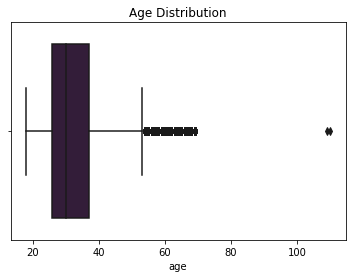

In [11]:
sns.boxplot(x=df.age)
plt.title('Age Distribution');

We have some outliers in the age column that I will look at.

In [12]:
# Defining outliers by IQR
q75,q25 = np.percentile(df['age'],[75,25])
intr_qr = q75-q25
 
max_bound = q75+(1.5*intr_qr)

In [13]:
outliers = df['age'][df['age'] > max_bound]

In [14]:
display(min(outliers))
display(max(outliers))
display(len(outliers))

54

110

2638

<AxesSubplot:xlabel='age', ylabel='Count'>

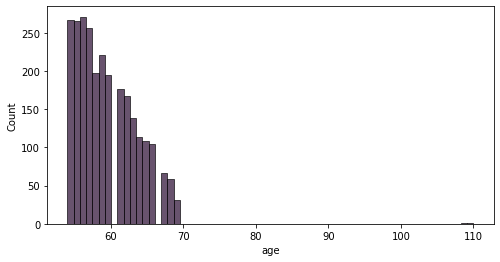

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(outliers,ax=ax)

We have quite many outliers where most of them actually make sense and I would call them natural outliers. However, I will remove all entries with an age > 90 since I strongly suspect those to be data entry errors.  

In [16]:
outliers = outliers[outliers < 90]
max(outliers)

69

So now the max age in our dataset is 69, which makes much more sense.

Predicting the exact age might be very difficult. I will put the users into age group and try to predict those instead.<br>
Since we don't have that many users over 60, I will group them into one group as '60+'

In [17]:
bins = [18,25,30,40,50,60,np.inf]
labels=['18-24','25-29', '30-39', '40-49', '50-59', '60+']
df['age2'] = pd.cut(df['age'], bins=bins, labels=labels,include_lowest = True)

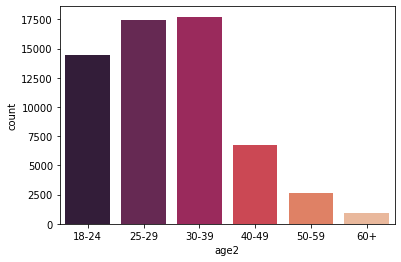

In [19]:
sns.countplot(x=df.age2);

Let's look at an example of essay4

In [21]:
df.essay4.iloc[2]

'okay this is where the cultural matrix gets so specific, it\'s like\nbeing in the crosshairs.<br />\n<br />\nfor what it\'s worth, i find myself reading more non-fiction than\nfiction. it\'s usually some kind of philosophy, art, or science text\nby silly authors such as ranciere, de certeau, bataille,\nbaudrillard, butler, stein, arendt, nietzche, zizek, etc. i\'ll\noften throw in some weird new age or pop-psychology book in the mix\nas well. as for fiction, i enjoy what little i\'ve read of eco,\nperec, wallace, bolao, dick, vonnegut, atwood, delilo, etc. when i\nwas young, i was a rabid asimov reader.<br />\n<br />\ndirectors i find myself drawn to are makavejev, kuchar, jodorowsky,\nherzog, hara, klein, waters, verhoeven, ackerman, hitchcock, lang,\ngorin, goddard, miike, ohbayashi, tarkovsky, sokurov, warhol, etc.\nbut i also like a good amount of "trashy" stuff. too much to\nname.<br />\n<br />\ni definitely enjoy the character development that happens in long\nform episodic tele

The column is in html format, so I will use regex to remove the tags.

In [22]:
df['essay4'] = df['essay4'].replace(r'(<!--.*?-->|<[^>]*>|\')','',regex=True)
df['essay4'] = df['essay4'].replace('\n',' ', regex=True)
df['essay4'] = df['essay4'].replace('\i',' ')

In [23]:
df.essay4.iloc[2]

'okay this is where the cultural matrix gets so specific, its like being in the crosshairs.  for what its worth, i find myself reading more non-fiction than fiction. its usually some kind of philosophy, art, or science text by silly authors such as ranciere, de certeau, bataille, baudrillard, butler, stein, arendt, nietzche, zizek, etc. ill often throw in some weird new age or pop-psychology book in the mix as well. as for fiction, i enjoy what little ive read of eco, perec, wallace, bolao, dick, vonnegut, atwood, delilo, etc. when i was young, i was a rabid asimov reader.  directors i find myself drawn to are makavejev, kuchar, jodorowsky, herzog, hara, klein, waters, verhoeven, ackerman, hitchcock, lang, gorin, goddard, miike, ohbayashi, tarkovsky, sokurov, warhol, etc. but i also like a good amount of "trashy" stuff. too much to name.  i definitely enjoy the character development that happens in long form episodic television over the course of 10-100 episodes, which a 1-2hr movie us

In [24]:
df['essay4'].isna().sum()

10537

I will also drop the rows with missing values

In [27]:
df.dropna(subset=['essay4'], inplace=True)
assert df['essay4'].isna().sum() == 0

In [28]:
len(df)

49409

To make it easier for the classifier, I will remove all stop words such as `“the”, “a”, “an”, “in” etc.`

In [30]:
from nltk.corpus import stopwords 
#from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english'))     

df["essay4"] = df["essay4"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [33]:
df.essay4.iloc[2]

'okay cultural matrix gets specific, like crosshairs. worth, find reading non-fiction fiction. usually kind philosophy, art, science text silly authors ranciere, de certeau, bataille, baudrillard, butler, stein, arendt, nietzche, zizek, etc. ill often throw weird new age pop-psychology book mix well. fiction, enjoy little ive read eco, perec, wallace, bolao, dick, vonnegut, atwood, delilo, etc. young, rabid asimov reader. directors find drawn makavejev, kuchar, jodorowsky, herzog, hara, klein, waters, verhoeven, ackerman, hitchcock, lang, gorin, goddard, miike, ohbayashi, tarkovsky, sokurov, warhol, etc. also like good amount "trashy" stuff. much name. definitely enjoy character development happens long form episodic television course 10-100 episodes, 1-2hr movie usually cant compete with. recent tv favorites are: breaking bad, wire, dexter, true blood, prisoner, lost, fringe. smattered sampling vast field music like deejay: art ensemble, sun ra, evan parker, lil wayne, dj funk, mr. fi

In [35]:
# Making sure that my changes in the column did not cause any na's
df['essay4'].isna().sum()

0

I will label encode the age groups

<u>Labels:<br><br></u>
0: '18-24'
<br>1: '25-29'
<br>2: '30-39'
<br>3: '40-49'
<br>4: '50-59'
<br>5: '60+ 
    

In [37]:
# First turning the text column into a list
essay4_text = df["essay4"].tolist()

# Labels
labels = [0 if k == '18-24' else 1 if k == '25-29' else 2 if k == '30-39' else 3 if k == '40-49'
          else 4 if k == '50-59' else 5 for k in df['age2']]

In [38]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(
    essay4_text, labels,test_size=0.2, random_state=1)

In [39]:
# Making the Count Vectors
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

#print(train_data[3])
#print(train_counts[3])

In [40]:
# Train & Test the NB Classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

In [41]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))

0.4143897996357013


In [42]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      2385
           1       0.40      0.38      0.39      2905
           2       0.39      0.61      0.48      2936
           3       0.28      0.10      0.15      1083
           4       0.21      0.01      0.01       422
           5       0.00      0.00      0.00       151

    accuracy                           0.41      9882
   macro avg       0.30      0.26      0.25      9882
weighted avg       0.40      0.41      0.39      9882



# <font color='magenta'>Summary (Age Predicions)</font>
I used the the text provided by the user in column "essay4" to predict the users age. The text in essay4 included <i>"favorite books, movies, show, music, and food"</i>. I removed the html tags and also stop words such as <I>"I", "if" & "and"</i> to simplify. 

I used a Naive Bayes classifier and trained the model with 80% of the data. The over-all accuracy of the model is 41%. If we look at the precision and recall scores for each age group, we can see that the model is much better at predicting the age of users between 18-39 than users above that age. I believe the reason for this is because there's such big class imbalance in our dataset. About 84% of the users belong to class 0,1 or 2.
<br><br>
An idea to solve this would be to either do over- or undersampling, but in this case I don't believe the general performance of the model will improve significantly.
<br><br>
<b>To summarize</b>, the model performed better than picking randomly, but the chance of our model predicting correctly is still below 50%.

# <font color='orange'>2. Predict gender with K-nearest Neighbors</font>
I will use height and body type as features to predict gender.

In [43]:
df_gender = df[['sex', 'height', 'body_type']]
df_gender = df_gender.copy()
df_gender.head()

,sex,height,body_type
0,m,75.0,a little extra
1,m,70.0,average
2,m,68.0,thin
3,m,71.0,thin
4,m,66.0,athletic


In [44]:
df_gender.isna().sum()

sex             0
height          2
body_type    4282
dtype: int64

I will drop the rows with missing values for body_type.

In [45]:
df_gender.dropna(subset=['body_type'], inplace=True)

In [46]:
# I will convert the height measurements to cm since it makes more sense for me
df_gender['height'] = df_gender['height'].apply(lambda x: x * 2,54)

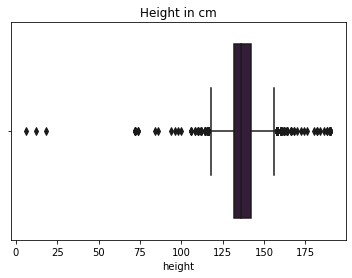

In [47]:
sns.boxplot(x=df_gender.height)
plt.title('Height in cm');

We have quite many outliers in the height column. I believe there's a mix of natural and data entry outliers here that we will have to deal with.

In [48]:
# Defining outliers by IQR
q75,q25 = np.nanpercentile(df_gender['height'],[75,25])
intr_qr = q75-q25
 
max_bound = q75+(1.5*intr_qr)
min_bound = q25-(1.5*intr_qr)

In [49]:
lower_outliers = df_gender['height'][df_gender['height'] < min_bound]
upper_outliers = df_gender['height'][df_gender['height'] > max_bound]

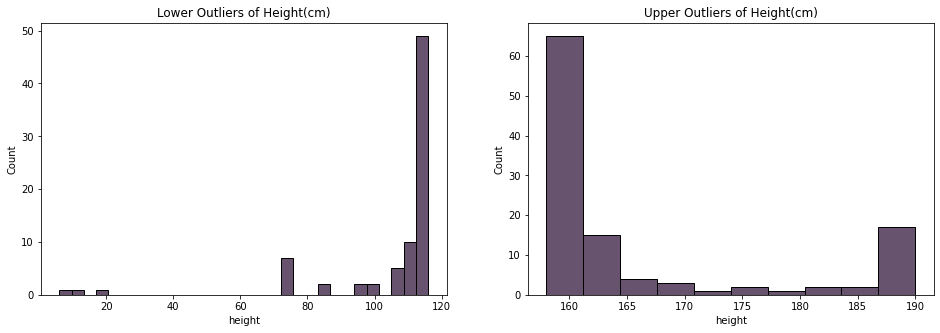

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.histplot(lower_outliers, ax=ax[0])
ax[0].set_title('Lower Outliers of Height(cm)')
sns.histplot(upper_outliers, ax=ax[1])
ax[1].set_title('Upper Outliers of Height(cm)');

I believe all of the <i>upper</i> outliers makes sense, but probably not the <i>lower</i> outliers. I will drop the lower outliers. 

In [51]:
df_gender.drop(df_gender[df_gender.height < min_bound].index, inplace=True)

For the missing values in height, I will replace them with the average height for that specific gender.

In [52]:
means = df_gender.groupby('sex')['height'].transform('mean')
df_gender['height'] = df_gender['height'].fillna(means)

df_gender.dropna(inplace=True)

In [53]:
# Making gender binary 
df_gender['sex'] = df_gender['sex'].apply(lambda x: 1 if x == 'm' else 0)

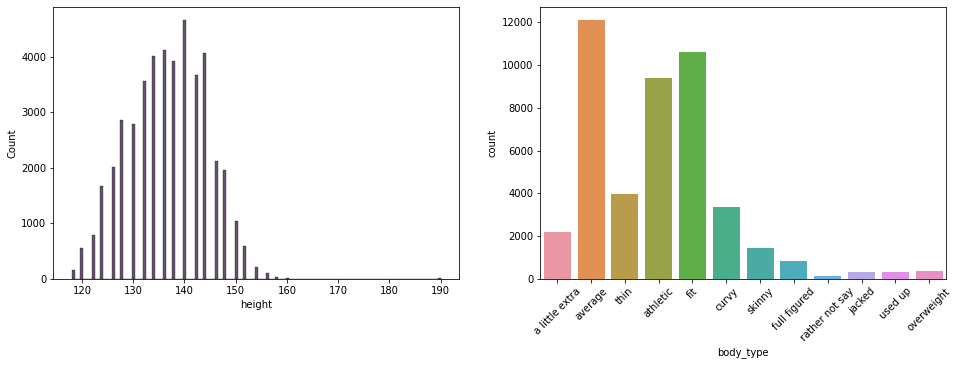

In [54]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.histplot(df_gender.height, ax=ax[0])
sns.countplot(x=df_gender['body_type'],ax=ax[1])
plt.xticks(rotation=45);

I will use pandas get_dummies for "body_type".

In [55]:
display(len(df_gender))
display(df_gender.sex.value_counts() / len(df_gender))

45047

1    0.605634
0    0.394366
Name: sex, dtype: float64

We have a slightly imbalanced classes. There are more male than female observations. Since we have quite many observations in general, I will do undersampling on the males to balance the classes.

In [56]:
df_gender2 = pd.get_dummies(df_gender)

In [57]:
# Separating features and response variable
x = df_gender2.drop(labels=['sex'], axis=1)
y = df_gender2['sex'].values

In [58]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_over, y_over = rus.fit_resample(x, y)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_transformed = scaler.fit_transform(X_over)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed, y_over, test_size=0.3, random_state=100)

In [61]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train) 

# Predict
y_pred = knn.predict(X_test)

# Measure accuracy performance
knn.score(X_test, y_test)

0.8425743503142884

That accuracy score when using 6 K's is pretty good! But I will test if we can do even better.

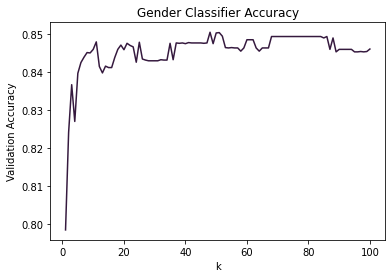

(99, 0.8461394127028802)

In [62]:
accuracies = []
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))

k_list = list(range(1,101))
from matplotlib import pyplot as plt
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Gender Classifier Accuracy')
plt.show()

display(max(enumerate(accuracies)));

The accuracy improves as we increase the number of K's. This makes me wonder if logistic regression is a better alternative. I will try it. 

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, log_loss
print(accuracy_score(y_test, y_pred))

0.849329205366357


Turns out that the accuracy score of the logistic regression model is a tiny bit higher than when we use KNN. Let's look at some more metrics.

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5365
           1       0.84      0.86      0.85      5294

    accuracy                           0.85     10659
   macro avg       0.85      0.85      0.85     10659
weighted avg       0.85      0.85      0.85     10659



'AUC Interpretation:'

'A: Outstanding = 0.9 to 1.0'

'B: Excellent/Good = 0.8 to 0.9'

'C: Acceptable/Fair = 0.7 to 0.8'

'D: Poor = 0.6 to 0.7'

'E: No Discrimination = 0.5 to 0.6'

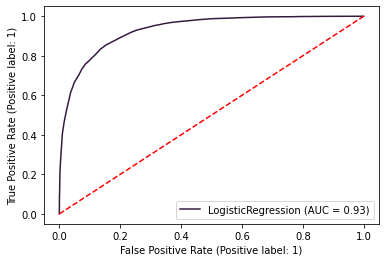

In [66]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
display('AUC Interpretation:',
'A: Outstanding = 0.9 to 1.0',
'B: Excellent/Good = 0.8 to 0.9',
'C: Acceptable/Fair = 0.7 to 0.8',
'D: Poor = 0.6 to 0.7',
'E: No Discrimination = 0.5 to 0.6')

The ROC-curve shows that our model performs <i>very</i> well!

# <font color='orange'>Summary (Gender Predictions)</font>
I have used height and body type as features to predict gender. In the height column there were many outliers. I defined all of the upper outliers as natural outliers and I decided to keep them. The lower outliers were of heights below 120cm, which I consider a very uncommon height for someone above 18. I defined them as data entry outliers and decided to remove them.

I used pandas get_dummies to encode the body_type column, and then used MinMaxScaler to transform both feature variables into an equal scale between 0 and 1. I also adjusted a small class imbalance by <i>underfitting</i> the male observations. 

I looked at the accuracy score of K-nearest Neighbors with a K between 1 and 100 which resulted in an accuracy score that increased the more K's we used. This made me doubt if KNN was actually the best model option, so I decided to test a logistic regression model instead. 

The logistic regression model had a score that was equal to the KNN-model where K=100. Since we had many observations, and the KNN model worked very slowly, I decided to go for the logistic regression model.

The logistic regression model is about equally good at predicting males than females. It also follows the ROC-curves top left corner very well, which is an indication of a good model fit.

# Reflection

I had a lot of learnings while doing this project and it was fun to actually practice hands-on what I have been learning in theory.


The challenges that I stumpled upon in this project were the following:
- `How to clean text data`
<br>This was my first time using NLTK and also really using regex 
<br>
<br>
- `Missing values`
<br> They can be treated in different ways depending on what they are. Height made sense to replace with the mean (after removing outliers), while body_type did not since it would be too uncertain. 
<br>
<br>
- `Different kind of outliers`
<br>In the height column it became clear how a perfectly "normal" value can be considered an outlier in one dataset. I would love to read more about how to deal with this and the effect.
<br>
<br>
- `How to pick the "right" model`
<br>This was actually what I found the hardest and that I will definetly spend time learning more about!
<br>
<br>
- `Class imbalances`
<br> This issue has not been dealt with so far in the courses I'm taking, but when I saw the correlation between model scores and the class distributions it became obvious. I have spent some time reading articles about how to deal with class imbalances but would love to learn more about it. I can imagine this is a very common thing.
<br>
<br>Lastly, thank you for reading through the whole notebook! Any feedback is always appreciated. I look forward to learn more about it and keep practicing my skills in data analysis and machine learning. 
